<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.654316,57.654844,99.421446,30.776518,-0.716967,253.790157,255.440717,-1.650560
1,0.0,1.0,88.465066,53.055054,69.001394,31.045896,3.346124,254.913533,252.915593,1.997940
2,0.0,2.0,78.853518,36.256563,94.344065,95.151036,3.691855,318.297037,314.689287,3.607750
3,0.0,3.0,23.943511,62.996922,41.582204,88.268400,-1.538240,225.252797,225.542267,-0.289470
4,0.0,4.0,34.715904,74.572241,83.459797,63.707620,-0.361624,266.093939,266.071794,0.022145
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.385739,76.228002,41.555430,61.881506,2.250627,281.301302,279.523978,1.777324
29996,999.0,26.0,34.480274,93.450081,55.541020,67.244820,3.749913,264.466108,259.735781,4.730328
29997,999.0,27.0,89.634734,22.952409,51.592437,68.738487,1.550975,244.469043,243.512236,0.956806
29998,999.0,28.0,77.728135,77.072910,67.380014,90.460277,-0.564906,322.076431,321.559774,0.516656


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.654316  57.654844  99.421446  30.776518 -0.716967  253.790157   
      1.0    88.465066  53.055054  69.001394  31.045896  3.346124  254.913533   
      2.0    78.853518  36.256563  94.344065  95.151036  3.691855  318.297037   
      3.0    23.943511  62.996922  41.582204  88.268400 -1.538240  225.252797   
      4.0    34.715904  74.572241  83.459797  63.707620 -0.361624  266.093939   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   89.385739  76.228002  41.555430  61.881506  2.250627  281.301302   
      26.0   34.480274  93.450081  55.541020  67.244820  3.749913  264.466108   
      27.0   89.634734  22.952409  51.592437  68.738487  1.550975  244.469043   
      28.0   77.728135  77.072910  67.380014  90.460277 -0.564906  322.076431   
      29.0   65.650215  84.404155  47.608811  24.309994 -0.089170  231.884005   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.440717 -1.650560  
      1.0    252.915593  1.997940  
      2.0    314.689287  3.607750  
      3.0    225.542267 -0.289470  
      4.0    266.071794  0.022145  
...                 ...       ...  
999.0 25.0   279.523978  1.777324  
      26.0   259.735781  4.730328  
      27.0   243.512236  0.956806  
      28.0   321.559774  0.516656  
      29.0   233.212236 -1.328232  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.654316  57.654844  99.421446  30.776518 -0.716967  253.790157   
      1.0    88.465066  53.055054  69.001394  31.045896  3.346124  254.913533   
      2.0    78.853518  36.256563  94.344065  95.151036  3.691855  318.297037   
      3.0    23.943511  62.996922  41.582204  88.268400 -1.538240  225.252797   
      4.0    34.715904  74.572241  83.459797  63.707620 -0.361624  266.093939   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   89.385739  76.228002  41.555430  61.881506  2.250627  281.301302   
      26.0   34.480274  93.450081  55.541020  67.244820  3.749913  264.466108   
      27.0   89.634734  22.952409  51.592437  68.738487  1.550975  244.469043   
      28.0   77.728135  77.072910  67.380014  90.460277 -0.564906  322.076431   
      29.0   65.650215  84.404155  47.608811  24.309994 -0.089170  231.884005   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.440717 -1.650560  
      1.0    252.915593  1.997940  
      2.0    314.689287  3.607750  
      3.0    225.542267 -0.289470  
      4.0    266.071794  0.022145  
...                 ...       ...  
999.0 25.0   279.523978  1.777324  
      26.0   259.735781  4.730328  
      27.0   243.512236  0.956806  
      28.0   321.559774  0.516656  
      29.0   233.212236 -1.328232  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,56.654316,57.654844,99.421446,30.776518,-0.716967,253.790157,255.440717,-1.650560
1,0.0,1.0,88.465066,53.055054,69.001394,31.045896,3.346124,254.913533,252.915593,1.997940
2,0.0,2.0,78.853518,36.256563,94.344065,95.151036,3.691855,318.297037,314.689287,3.607750
3,0.0,3.0,23.943511,62.996922,41.582204,88.268400,-1.538240,225.252797,225.542267,-0.289470
4,0.0,4.0,34.715904,74.572241,83.459797,63.707620,-0.361624,266.093939,266.071794,0.022145
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,89.385739,76.228002,41.555430,61.881506,2.250627,281.301302,279.523978,1.777324
29996,999.0,26.0,34.480274,93.450081,55.541020,67.244820,3.749913,264.466108,259.735781,4.730328
29997,999.0,27.0,89.634734,22.952409,51.592437,68.738487,1.550975,244.469043,243.512236,0.956806
29998,999.0,28.0,77.728135,77.072910,67.380014,90.460277,-0.564906,322.076431,321.559774,0.516656


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    56.654316  57.654844  99.421446  30.776518 -0.716967  253.790157   
      1.0    88.465066  53.055054  69.001394  31.045896  3.346124  254.913533   
      2.0    78.853518  36.256563  94.344065  95.151036  3.691855  318.297037   
      3.0    23.943511  62.996922  41.582204  88.268400 -1.538240  225.252797   
      4.0    34.715904  74.572241  83.459797  63.707620 -0.361624  266.093939   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   89.385739  76.228002  41.555430  61.881506  2.250627  281.301302   
      26.0   34.480274  93.450081  55.541020  67.244820  3.749913  264.466108   
      27.0   89.634734  22.952409  51.592437  68.738487  1.550975  244.469043   
      28.0   77.728135  77.072910  67.380014  90.460277 -0.564906  322.076431   
      29.0   65.650215  84.404155  47.608811  24.309994 -0.089170  231.884005   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.440717 -1.650560  
      1.0    252.915593  1.997940  
      2.0    314.689287  3.607750  
      3.0    225.542267 -0.289470  
      4.0    266.071794  0.022145  
...                 ...       ...  
999.0 25.0   279.523978  1.777324  
      26.0   259.735781  4.730328  
      27.0   243.512236  0.956806  
      28.0   321.559774  0.516656  
      29.0   233.212236 -1.328232  

[30000 rows x 8 columns]

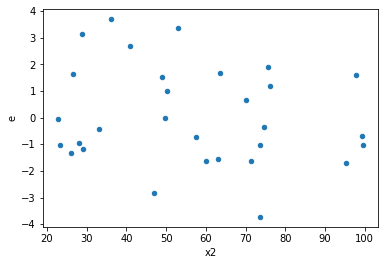

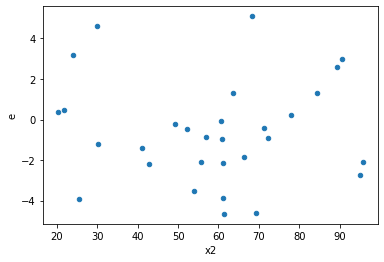

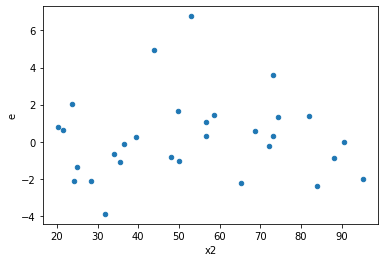

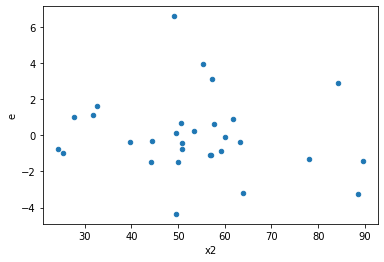

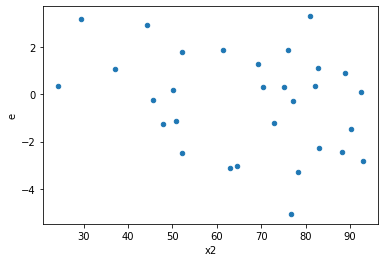

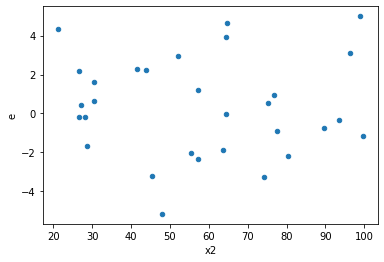

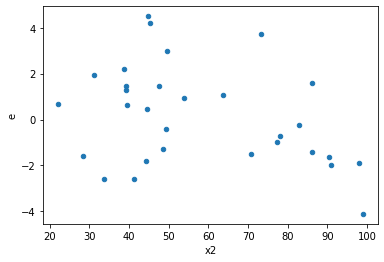

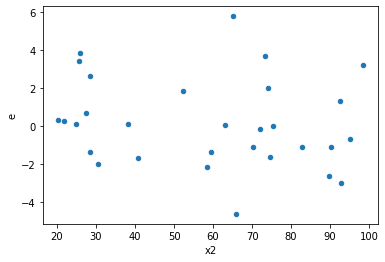

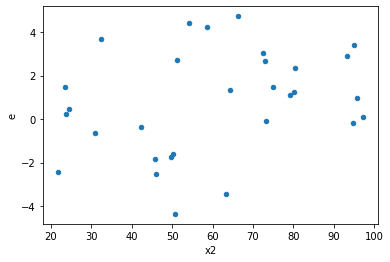

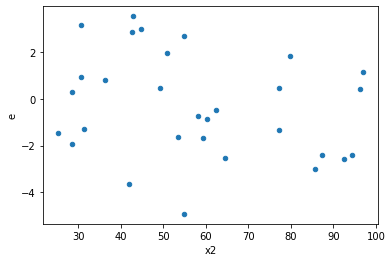

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,14.0,13.59245839685415,56.618624792560276,1.6990572996067688,4.044187485182877,2.380253736068152,0.14910377203480563,0.9254481139825972,0.07455188601740281,Reject005=1 : Homoscedasticity
1.0,10.0,12.0,44.55271565833449,67.5643185636412,4.455271565833449,5.630359880303433,1.2637523430628768,0.6911063472930983,0.6544468263534509,0.34555317364654914,Reject005=1 : Homoscedasticity
2.0,12.0,10.0,37.80417076281854,77.03686447425153,3.150347563568212,7.703686447425153,2.445344931623876,0.16617858057867574,0.9169107097106621,0.08308929028933787,Reject005=1 : Homoscedasticity
3.0,9.0,13.0,14.059706652103811,92.42397533723981,1.5621896280115346,7.109536564403062,4.551007404557271,0.014179987081528456,0.9929100064592358,0.007089993540764228,Reject005=0 : Heteroscedasticity
4.0,8.0,14.0,6.880980751834193,65.12412359798726,0.8601225939792742,4.651723114141947,5.4082094188703955,0.006106712070617526,0.9969466439646912,0.003053356035308763,Reject005=0 : Heteroscedasticity
6.0,12.0,10.0,36.604401288415005,44.302709406327914,3.050366774034584,4.430270940632791,1.4523731960183497,0.5626739939998726,0.7186630030000637,0.2813369969999363,Reject005=1 : Homoscedasticity
7.0,8.0,14.0,29.167195335760507,97.59685714310615,3.6458994169700634,6.9712040816504395,1.912067033227121,0.2759507815044868,0.8620246092477566,0.1379753907522434,Reject005=1 : Homoscedasticity
8.0,15.0,7.0,90.87929842885129,48.962403665541075,6.0586198952567525,6.994629095077296,1.154492147717228,0.8924231796200532,0.5537884101899734,0.4462115898100266,Reject005=1 : Homoscedasticity
9.0,11.0,11.0,49.172722769294985,56.93043452415304,4.470247524481362,5.175494047650276,1.1577645352537245,0.8123675218755226,0.5938162390622387,0.4061837609377613,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,14.0,13.59245839685415,56.618624792560276,1.6990572996067688,4.044187485182877,2.380253736068152,0.14910377203480563,Reject005=1 : Homoscedasticity
1.0,10.0,12.0,44.55271565833449,67.5643185636412,4.455271565833449,5.630359880303433,1.2637523430628768,0.6911063472930983,Reject005=1 : Homoscedasticity
2.0,12.0,10.0,37.80417076281854,77.03686447425153,3.150347563568212,7.703686447425153,2.445344931623876,0.16617858057867574,Reject005=1 : Homoscedasticity
3.0,9.0,13.0,14.059706652103811,92.42397533723981,1.5621896280115346,7.109536564403062,4.551007404557271,0.014179987081528456,Reject005=0 : Heteroscedasticity
4.0,8.0,14.0,6.880980751834193,65.12412359798726,0.8601225939792742,4.651723114141947,5.4082094188703955,0.006106712070617526,Reject005=0 : Heteroscedasticity
5.0,17.0,5.0,86.07284489973262,21.248553311321803,5.063108523513684,4.249710662264361,0.8393481282354891,0.708879921684829,Reject005=1 : Homoscedasticity
6.0,12.0,10.0,36.604401288415005,44.302709406327914,3.050366774034584,4.430270940632791,1.4523731960183497,0.5626739939998726,Reject005=1 : Homoscedasticity
7.0,8.0,14.0,29.167195335760507,97.59685714310615,3.6458994169700634,6.9712040816504395,1.912067033227121,0.2759507815044868,Reject005=1 : Homoscedasticity
8.0,15.0,7.0,90.87929842885129,48.962403665541075,6.0586198952567525,6.994629095077296,1.154492147717228,0.8924231796200532,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      905
Reject005=0 : Heteroscedasticity     95
Name: Result_test, dtype: int64